## Milestone 2 EDA - Kadie Wert
---

### Modifying the dataset

In [48]:
#Importing dataset
import pandas as pd
data = pd.read_csv('https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.548
1334,18,female,31.920,0,no,northeast,2205.981
1335,18,female,36.850,0,no,southeast,1629.833
1336,21,female,25.800,0,no,southwest,2007.945


In [49]:
dt=data
dt = (pd.read_csv('https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv')
    .rename(columns={"charges": "medical expenses"})
    .sort_values("bmi", ascending=False)
       )
dt.head(5)

,age,sex,bmi,children,smoker,region,medical expenses
1317,18,male,53.130,0,no,southeast,1163.463
1047,22,male,52.580,1,yes,southeast,44501.398
847,23,male,50.380,1,no,southeast,2438.055
116,58,male,49.060,0,no,southeast,11381.325
286,46,female,48.070,2,no,northeast,9432.925


In [50]:
df=dt
df.columns = df.columns.str.upper()
df.head(5)

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,MEDICAL EXPENSES
1317,18,male,53.130,0,no,southeast,1163.463
1047,22,male,52.580,1,yes,southeast,44501.398
847,23,male,50.380,1,no,southeast,2438.055
116,58,male,49.060,0,no,southeast,11381.325
286,46,female,48.070,2,no,northeast,9432.925


In [51]:
dm=df
dm['SEX'] = dm['SEX'].str.capitalize()
dm['SMOKER'] = dm['SMOKER'].str.capitalize()
dm['REGION'] = dm['REGION'].str.capitalize()
dm.head(5)

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,MEDICAL EXPENSES
1317,18,Male,53.130,0,No,Southeast,1163.463
1047,22,Male,52.580,1,Yes,Southeast,44501.398
847,23,Male,50.380,1,No,Southeast,2438.055
116,58,Male,49.060,0,No,Southeast,11381.325
286,46,Female,48.070,2,No,Northeast,9432.925


---

### Data analysis

In [52]:
#Importing
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [53]:
#Dataframe analysis
print("Number of rows, columns: {}".format(dm.shape))

Number of rows, columns: (1338, 7)


In [54]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1317 to 172
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AGE               1338 non-null   int64  
 1   SEX               1338 non-null   object 
 2   BMI               1338 non-null   float64
 3   CHILDREN          1338 non-null   int64  
 4   SMOKER            1338 non-null   object 
 5   REGION            1338 non-null   object 
 6   MEDICAL EXPENSES  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [55]:
#stats
pd.options.display.float_format = "{:.3f}".format
dm.describe()

,AGE,BMI,CHILDREN,MEDICAL EXPENSES
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


In [71]:
dl=dm
dl.groupby('SEX')['MEDICAL EXPENSES'].agg([sum, np.mean]).rename(columns= {'sum':'Sum of Medical Expenses', 'mean':'Average Medical Expenses'})

,Sum of Medical Expenses,Average Medical Expenses
SEX,,
Female,8321061.195,12569.579
Male,9434763.796,13956.751


---

### Plot analysis

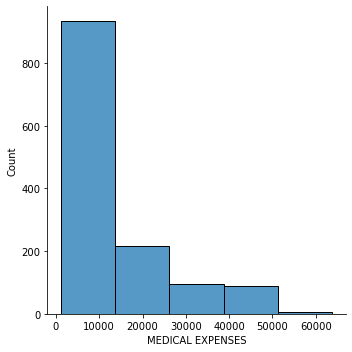

In [56]:
#This histogram shows that the majority of people (in this dataset) have ~$13000 in medical charges 
sns.displot(
    dm['MEDICAL EXPENSES'],
    bins=5
)

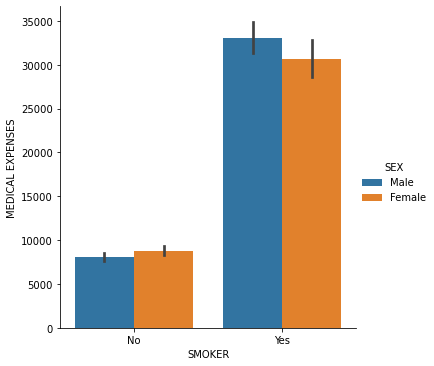

In [59]:
#plot shows that people that smoke are more likely to have higher medical charges
#Males have higher medical expenses than females if they're a smoker, but females have higher medical expenses when they are non-smokers
sns.catplot(data=dm, kind="bar", x="SMOKER", y="MEDICAL EXPENSES", hue="SEX", aspect=1.0)

<AxesSubplot:xlabel='AGE', ylabel='MEDICAL EXPENSES'>

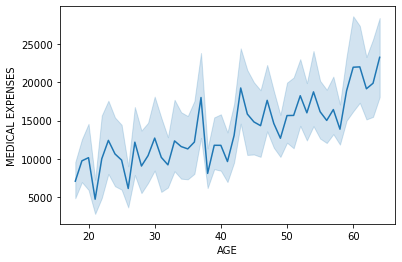

In [76]:
#This plot is gradually increasing with age, therefore, it shows that older people generally have higher medical expenses
sns.lineplot(data=dm, x="AGE", y="MEDICAL EXPENSES")

---